# Advanced Seaborn

### In this article, we delve into the advanced topics of Seaborn to unlock its true potential by creating BiVariate Plots, Multi-Variate Plots, and Matrix Plots.

In [47]:
import pandas as pd   # DAwPy
import numpy as np   # DAwPy

import seaborn as sns   # Stats-1 & DAwPy
from scipy import stats   # Stats-1 & DAwPy
from scipy.stats import kurtosis, skew   # Stats-1 & DAwPy

# import matplotlib
import matplotlib.pyplot as plt  
%matplotlib inline   

import warnings;
warnings.filterwarnings('ignore')

In [48]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Bivariate Plots

In [49]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


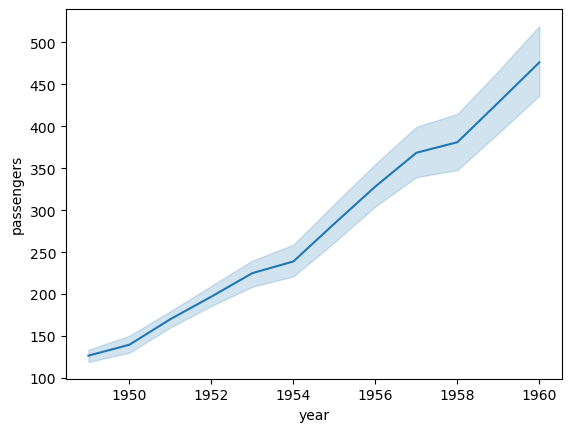

In [50]:
sns.lineplot(data=flights, x="year", y="passengers");

# time serisi icin daha uygun
# x e time ataniyor genellikle
# mean cizgisi
# her yil icin ci araligi
# varyasyon arttikca ci de genisliyor..

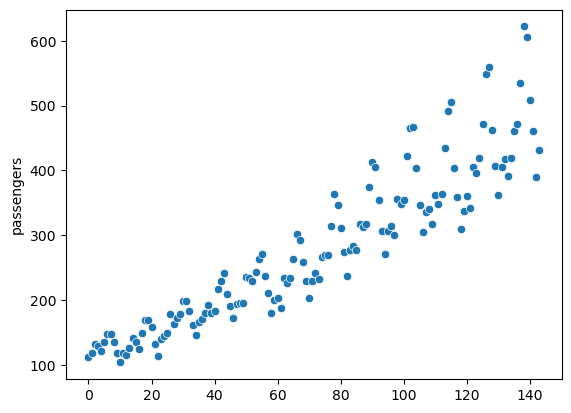

In [51]:
sns.scatterplot(x=flights.index, y=flights.passengers );

## Regression Plot

- A Regression Plot focuses on the relationship between two numerical variables
- The regression line represents the best-fitting linear model for predicting tips based on total bill amounts.
- This plot is useful for understanding the linear relationship between these two variables.

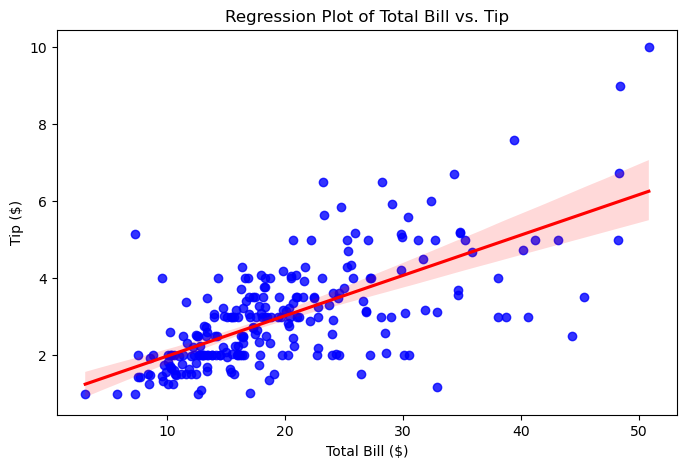

In [25]:
plt.figure(figsize=(8, 5))
sns.regplot(x="total_bill", y="tip", data=tips, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Total Bill vs. Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

# In the context of seaborn's regplot function, "kws" stands for "keyword arguments".

## Joint Plot

- A joint plot combines scatter plots, histograms, and density plots to visualize the relationship between two numerical variables.
- The central element of a Joint Plot is a Scatter Plot that displays the data points of the two variables against each other, along the x-axis and y-axis of the Scatter Plot, there are histograms or Kernel Density Estimation (KDE) plots for each individual variable. 

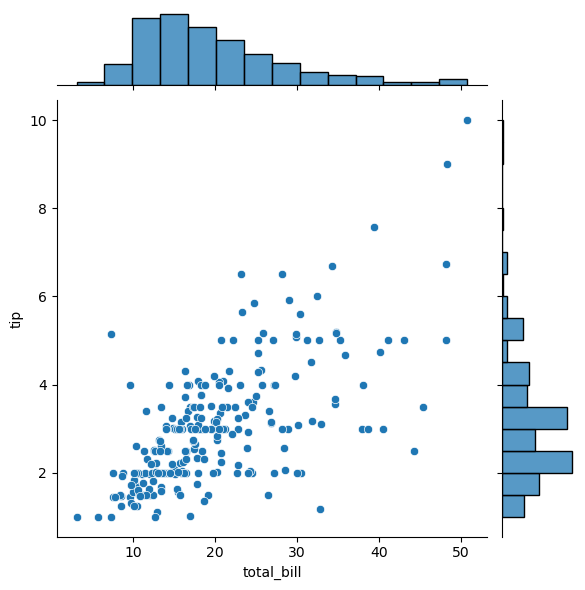

In [17]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter")  # default olarak scatter
plt.show()

- kind can be one of [‘scatter’, ‘hist’, ‘hex’, ‘kde’, ‘reg’, ‘resid’] these.

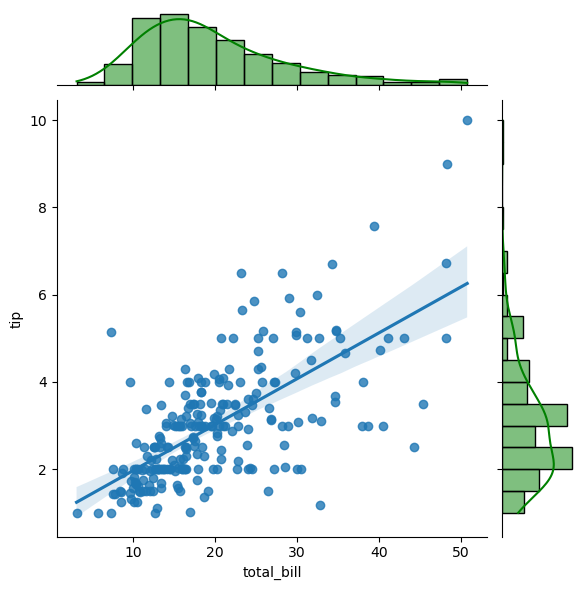

In [29]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg", marginal_kws={"color": "g"})

plt.show()

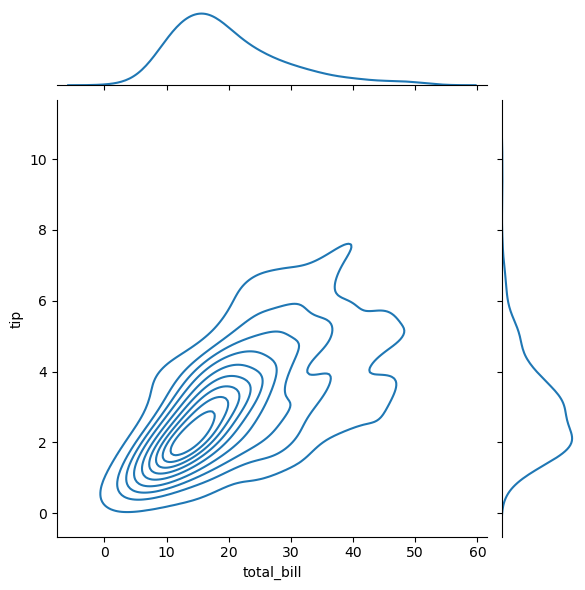

In [27]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")

plt.show()

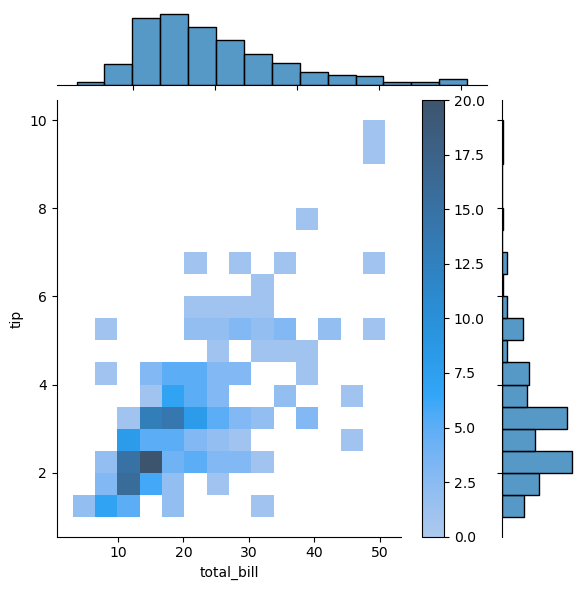

In [28]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hist", cbar= True)
plt.show()

## Hexbin Plot

- A Hexbin plot, short for Hexagonal Binning plot, groups data points into hexagonal bins, allowing you to visualize data density and patterns more effectively.
- These are especially valuable with large datasets when scatter plots with individual points become too crowded and hard to interpret!
- You can create a Hexbin plot, by using the kind parameter of joint plot. 
- You can customize the color map, grid size, and other plot parameters to fine-tune the appearance of the Hexbin Plot.

In [36]:
# sns.hexplot(x="total_bill", y="tip", data=tips, kind="reg")
# plt.show()

# AttributeError: module 'seaborn' has no attribute 'hexplot'

<Figure size 800x500 with 0 Axes>

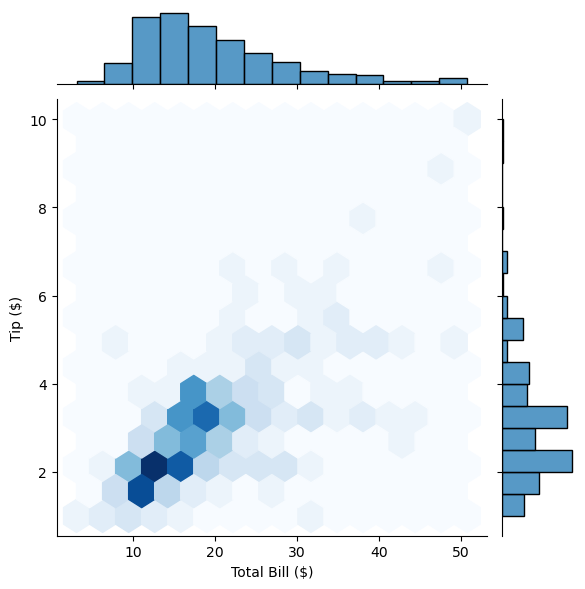

In [41]:
plt.figure(figsize=(8, 5))
sns.jointplot(x="total_bill", y="tip", kind='hex', data=tips, gridsize=15, cmap="Blues")

plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

- Now, this confirms that the Hexbin plot gives much more clarity than the scatter plot for a large dataset.

# Multivariate Plots

- these plots give us a lot of flexibility to explore the relationships and patterns among three or more variables simultaneously.

## Using Parameters to add dimensions

## 1.Using Hue parameter

- Using the hue parameter will add color to the plot based on the provided categorical variable, specifying a unique color for each of the categories.
- This parameter can be used almost all of the plots like .scatterplot() , .boxplot() , .violinplot() , .lineplot() , etc.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


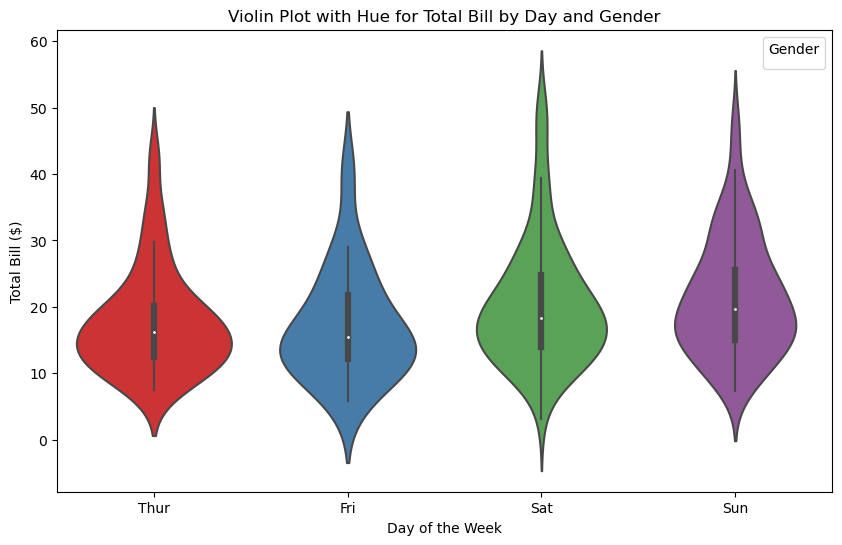

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="day",         # x-axis: Days of the week (categorical)
    y="total_bill",  # y-axis: Total bill amount (numerical)
    data=tips, 
    palette="Set1",  # Color palette
    split=True       # Split violins by hue categories
)

plt.title("Violin Plot with Hue for Total Bill by Day and Gender")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")
plt.legend(title="Gender")
plt.show()

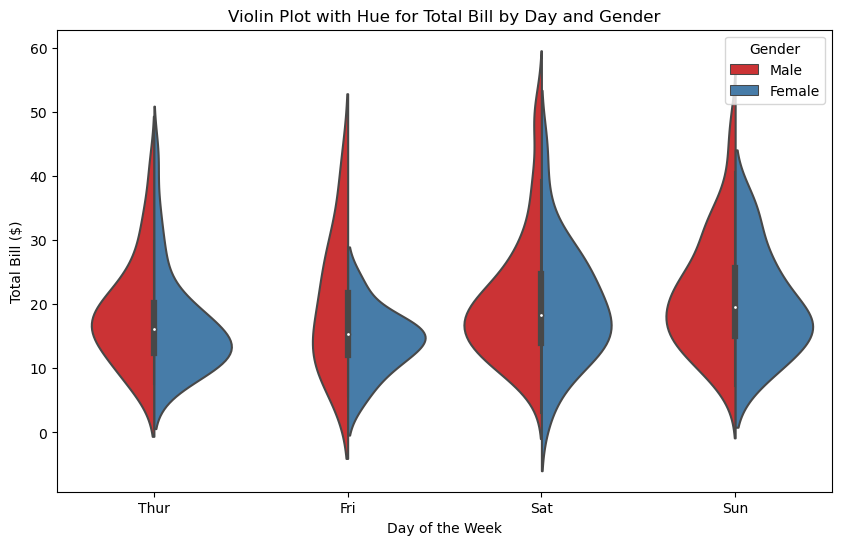

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="day",         # x-axis: Days of the week (categorical)
    y="total_bill",  # y-axis: Total bill amount (numerical)
    data=tips, 
    hue="sex",       # Color by gender (categorical)
    palette="Set1",  # Color palette
    split=True      # Split violins by hue categories
)

plt.title("Violin Plot with Hue for Total Bill by Day and Gender")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")
plt.legend(title="Gender")
plt.show()

## 2.Using Size parameter

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


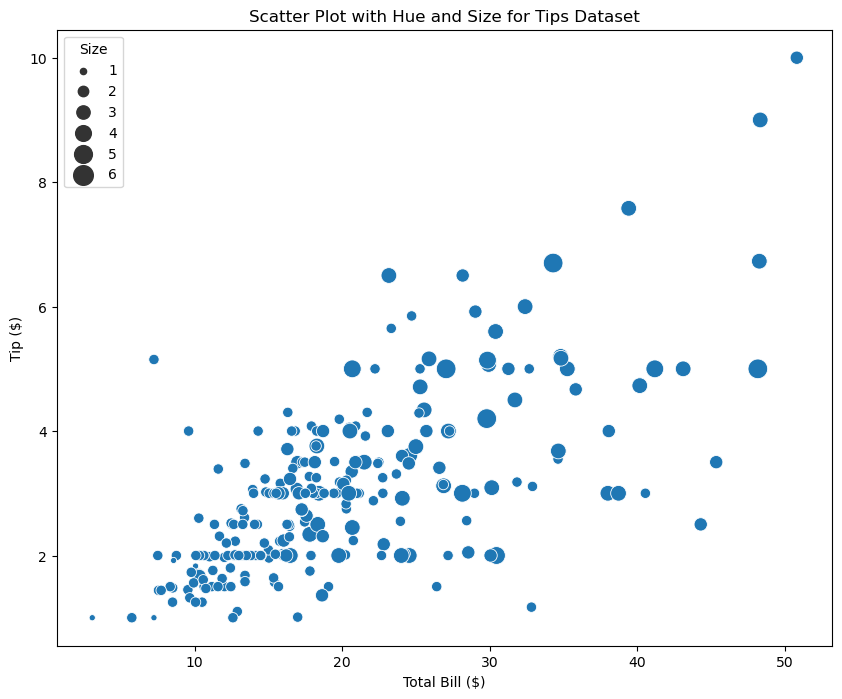

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="total_bill", 
    y="tip", 
    data=tips,       # Color by day (categorical)
    size="size",    # Vary marker size by size column (numerical)
    sizes=(20, 200),  # Define the size range for markers
    palette="Set1"  # Color palette
)
plt.title("Scatter Plot with Hue and Size for Tips Dataset")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend(title="Size")
plt.show()

## Relational Plot

- A Relational Plot allows you to visualize the relationship between two numerical variables, along with additional categorical or numerical dimensions.

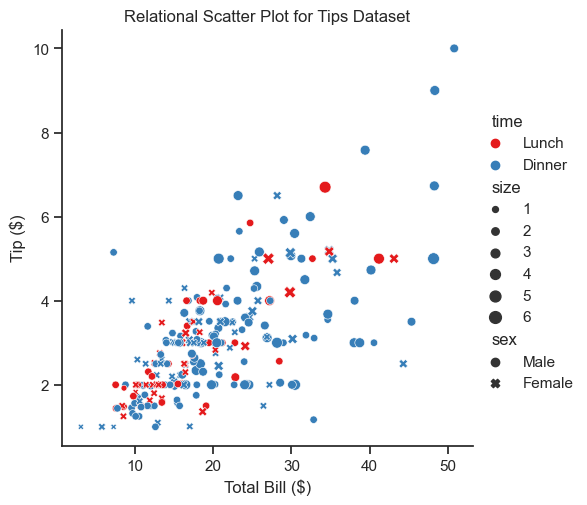

In [107]:
sns.relplot(x="total_bill", y="tip", data=tips, hue="time", style="sex", size="size", palette="Set1")
plt.title("Relational Scatter Plot for Tips Dataset")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.savefig('relplot_with_mv.png')
plt.show()

- The time column is used for coloring data points with the hue parameter, size column for varying size with the size parameter, and sex column for the marker parameter.

## Facet Grid

- A Facet Grid is a feature in Seaborn that allows you to create a grid of subplots, each representing a different subset of your data.
- In this way, Facet Grids are used to compare patterns or relationships with multiple variables within different categories.

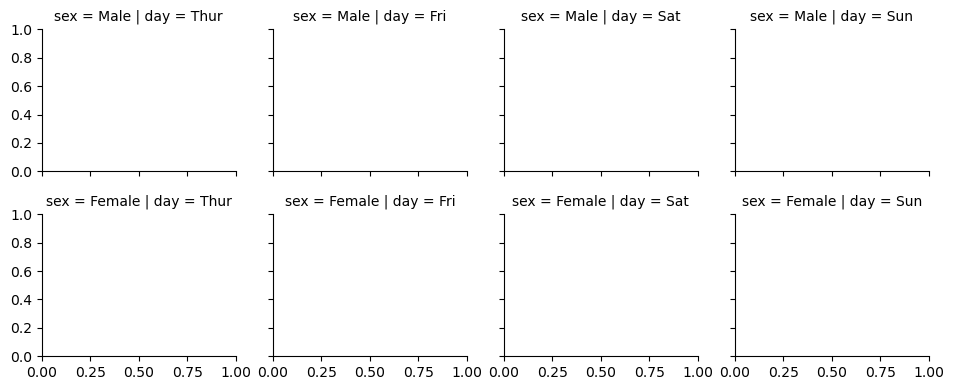

In [45]:
# Create a Facet Grid of histograms for different days
g = sns.FacetGrid(tips, row="sex", col="day", height=2, aspect=1.2) # the aspect parameter controls the aspect ratio of each facet (subplot) in the grid.
g


- After creating the grid object you need to map it to any plot of your choice.

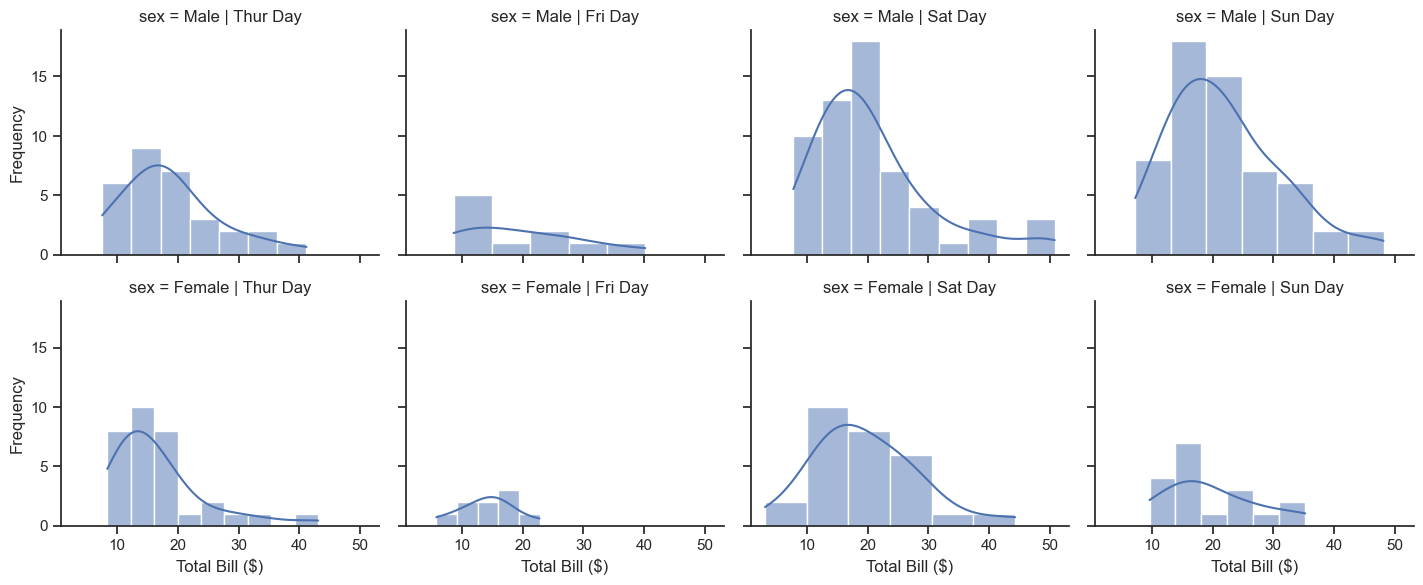

In [111]:
# Create a Facet Grid of histograms for different days
g = sns.FacetGrid(tips, row="sex", col="day", height=3, aspect=1.2)


g.map(sns.histplot, "total_bill", kde=True)
g.set_axis_labels("Total Bill ($)", "Frequency")  # g.set_axis_labels(x_var=None, y_var=None, clear_inner=True, **kwargs)
g.set_titles(col_template="{col_name} Day")

plt.show()

# col_template: Template for the column variable when titles are drawn on the grid margins. 
# Must have {col_var} and {col_name} formatting keys.


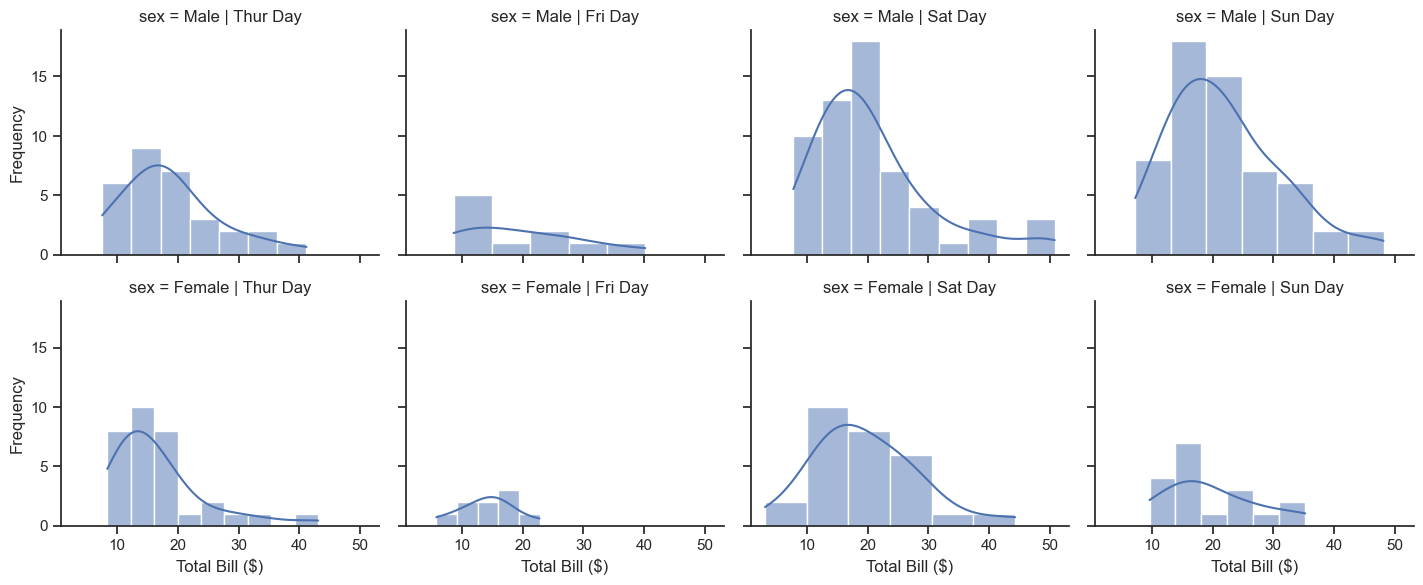

In [121]:
g = sns.FacetGrid(tips, row="sex", col="day", height=3, aspect=1.2)


g.map(sns.histplot, "total_bill", kde=True)
g.set_axis_labels("Total Bill ($)", "Frequency")    # g.set_axis_labels(x_var=None, y_var=None, clear_inner=True, **kwargs)
g.set_titles(col_template="{col_name} Day")

plt.show()

## Pair Plot

- A Pair plot provides a grid of scatterplots, and histograms, where each plot shows the relationship between two variables, which is why it is also called a Pairwise Plot or Scatterplot Matrix.
- The diagonal cells typically display histograms or kernel density plots for individual variables, showing their distributions.
- The off-diagonal cells in the grid often display scatterplots, showing how two variables are related.
- Pair Plots are particularly useful for understanding patterns, correlations, and distributions across multiple dimensions in your data.

- Pair plot, bir veri kümesindeki her bir sayısal değişken çifti için bir scatter plot çizer ve bu scatter plotları bir araya getirerek bir matris oluşturur. Bu matris, veri kümesindeki değişkenler arasındaki ilişkileri ve dağılımları görsel olarak analiz etmek için kullanılır. Her bir scatter plot, belirli bir değişken çiftinin ilişkisini ve dağılımını gösterir.
- Pair plot ayrıca, aynı değişkenlerin histogramlarını da çizerek her bir değişkenin dağılımını tek başına gösterir. Bu şekilde, her bir değişkenin dağılımını inceleyebilir ve değişkenler arasındaki ilişkileri daha iyi anlayabilirsiniz.

In [52]:
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Iris veri seti, bitki biliminde sıkça kullanılan bir veri setidir ve Iris bitkilerinin çiçek özelliklerini içerir. Bu veri seti üç farklı türde Iris bitkisi (Iris setosa, Iris versicolor ve Iris virginica) için dört farklı özellikten oluşur:

Çanak yaprak uzunluğu (sepal_length)
Çanak yaprak genişliği (sepal_width)
Taç yaprak uzunluğu (petal_length)
Taç yaprak genişliği (petal_width)

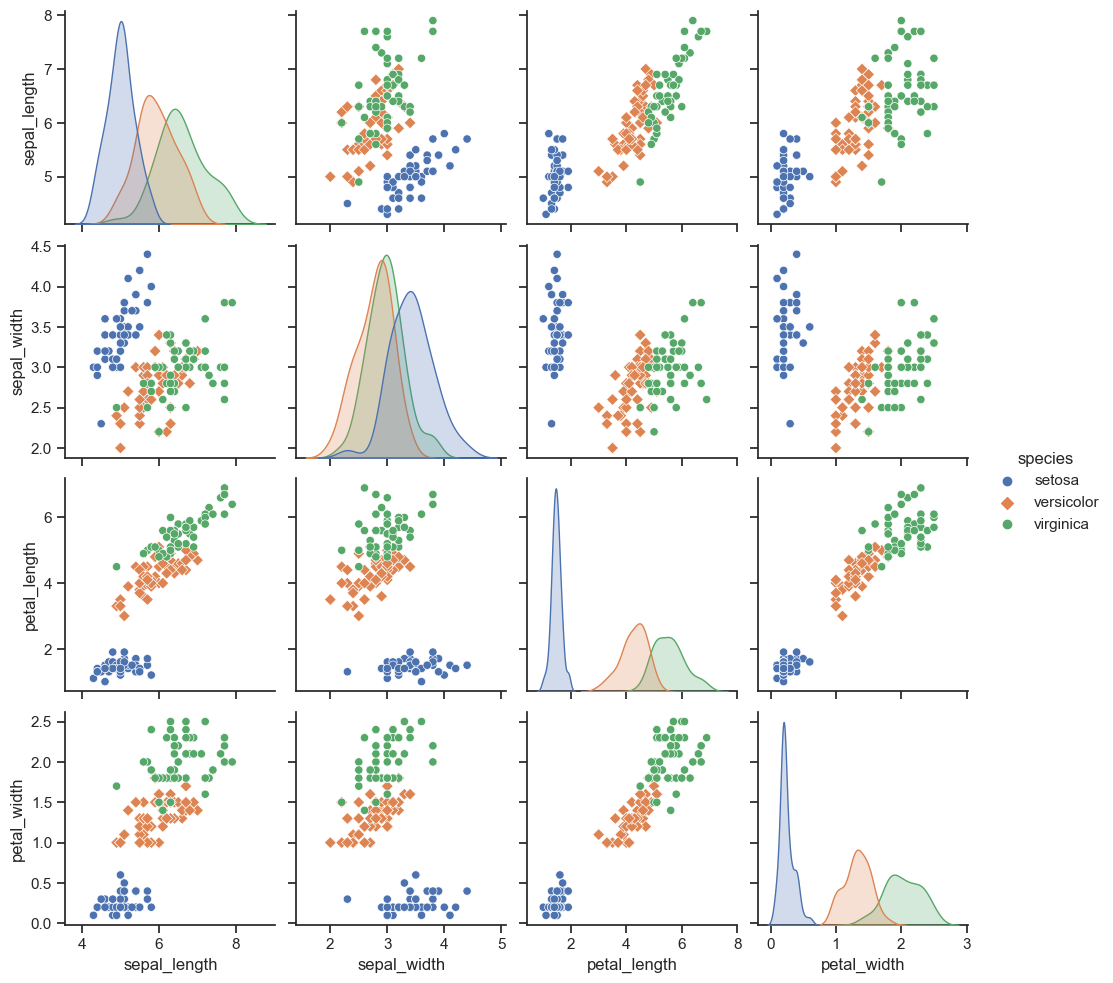

In [117]:
sns.pairplot(iris, hue="species", markers=["o", "D"])
plt.show()

## Pair Grid

- By using a pair grid you can customize the lower, upper, and diagonal plots individually.

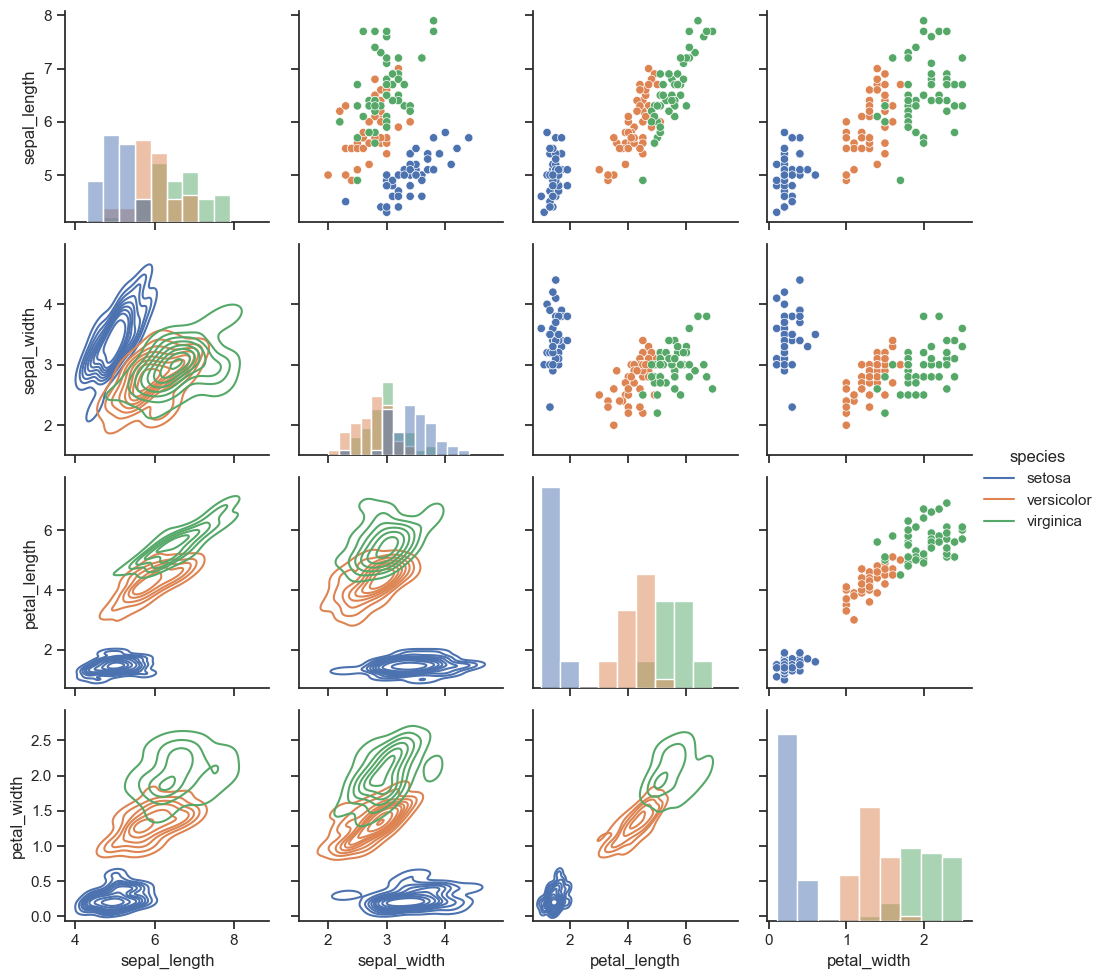

In [105]:
g = sns.PairGrid(iris, hue="species")
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.show()

- PairGrid, bir veri kümesindeki her bir sayısal değişken çifti için ayrı ayrı çizim alanları oluşturur. Ardından, her bir çizim alanında istediğiniz türde bir grafik çizimi yapabilirsiniz. Örneğin, scatter plot, regresyon çizgisi, histogram veya keman grafiği gibi.

- PairGrid, birçok veri seti incelemesi için kullanılabilir ve özellikle bir veri setindeki çok sayıda değişken arasındaki ilişkileri analiz etmek için yararlıdır. PairGrid'in esnekliği, kullanıcıların her bir değişken çifti için farklı grafik türlerini kullanmasına olanak tanır, böylece veri setini kapsamlı bir şekilde inceleyebilir ve anlamlandırabilirler.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">SEABORN PLOT TYPES</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<img src=https://i.ibb.co/Q9SXCR1/Capture12.png width="700" height="200">   